<a href="https://colab.research.google.com/github/abhiijndal/Data_viz/blob/main/heart_failure_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
des=df.describe()
des

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
des=df.describe()
des

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
group=df.groupby(['age']).sum()
group

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,
40.000,2,2248,2,255,1,1837000.00,6.60,964,5,2,1388,0
41.000,0,148,0,40,0,374000.00,0.80,140,1,1,68,0
42.000,2,6357,2,250,0,1708358.03,10.28,960,5,3,1004,1
43.000,1,358,0,50,0,237000.00,1.30,135,0,0,97,0
44.000,0,666,2,70,2,498358.03,2.30,269,2,1,323,0
45.000,4,23541,11,746,5,6294716.06,19.46,2614,12,3,2970,6
46.000,1,1178,1,92,2,882358.03,4.18,401,0,0,316,1
47.000,0,582,0,25,0,130000.00,0.80,134,1,0,201,0
48.000,2,713,2,85,1,331000.00,3.50,251,0,0,208,2


In [12]:
type=df['age'].astype(int)
type.min()

40

In [13]:
type=df['age'].astype(int)
type.max()

95

In [14]:
corr=group.corr()
corr


,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,1.000000,0.675458,0.903700,0.884110,0.772018,0.861596,0.889563,0.888365,0.872582,0.840073,0.819679,0.825088
creatinine_phosphokinase,0.675458,1.000000,0.794545,0.849434,0.640389,0.879881,0.793207,0.853231,0.875083,0.745006,0.865233,0.737934
diabetes,0.903700,0.794545,1.000000,0.938656,0.822058,0.935454,0.921609,0.946285,0.905827,0.851752,0.904397,0.872357
ejection_fraction,0.884110,0.849434,0.938656,1.000000,0.884137,0.990149,0.938956,0.995376,0.972789,0.928931,0.972872,0.864050
high_blood_pressure,0.772018,0.640389,0.822058,0.884137,1.000000,0.879232,0.824888,0.892434,0.842071,0.846455,0.851572,0.837849
platelets,0.861596,0.879881,0.935454,0.990149,0.879232,1.000000,0.916637,0.992963,0.971176,0.912613,0.979720,0.866223
serum_creatinine,0.889563,0.793207,0.921609,0.938956,0.824888,0.916637,1.000000,0.940055,0.926400,0.883625,0.868813,0.920804
serum_sodium,0.888365,0.853231,0.946285,0.995376,0.892434,0.992963,0.940055,1.000000,0.975995,0.930463,0.976777,0.877307
sex,0.872582,0.875083,0.905827,0.972789,0.842071,0.971176,0.926400,0.975995,1.000000,0.922620,0.955985,0.848365
smoking,0.840073,0.745006,0.851752,0.928931,0.846455,0.912613,0.883625,0.930463,0.922620,1.000000,0.899553,0.792515


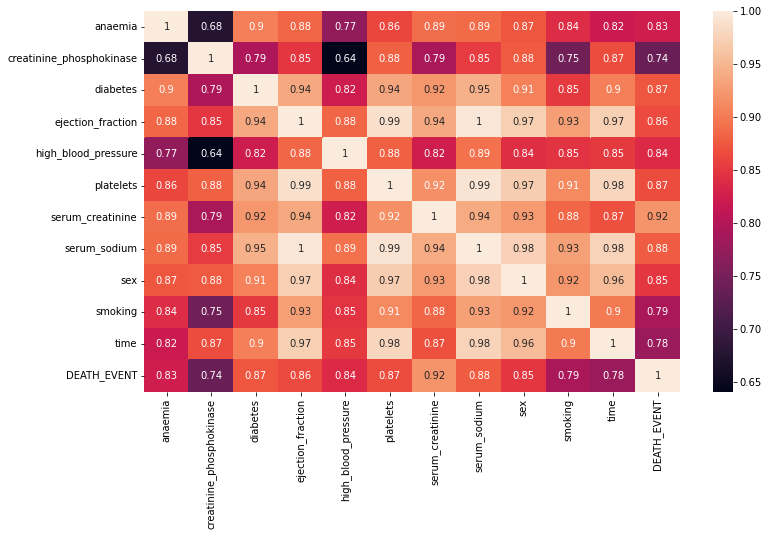

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

In [16]:
def plot_hist(col,bins=30,title="",xlabels="",ax=None):
    sns.distplot(col,bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabels)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

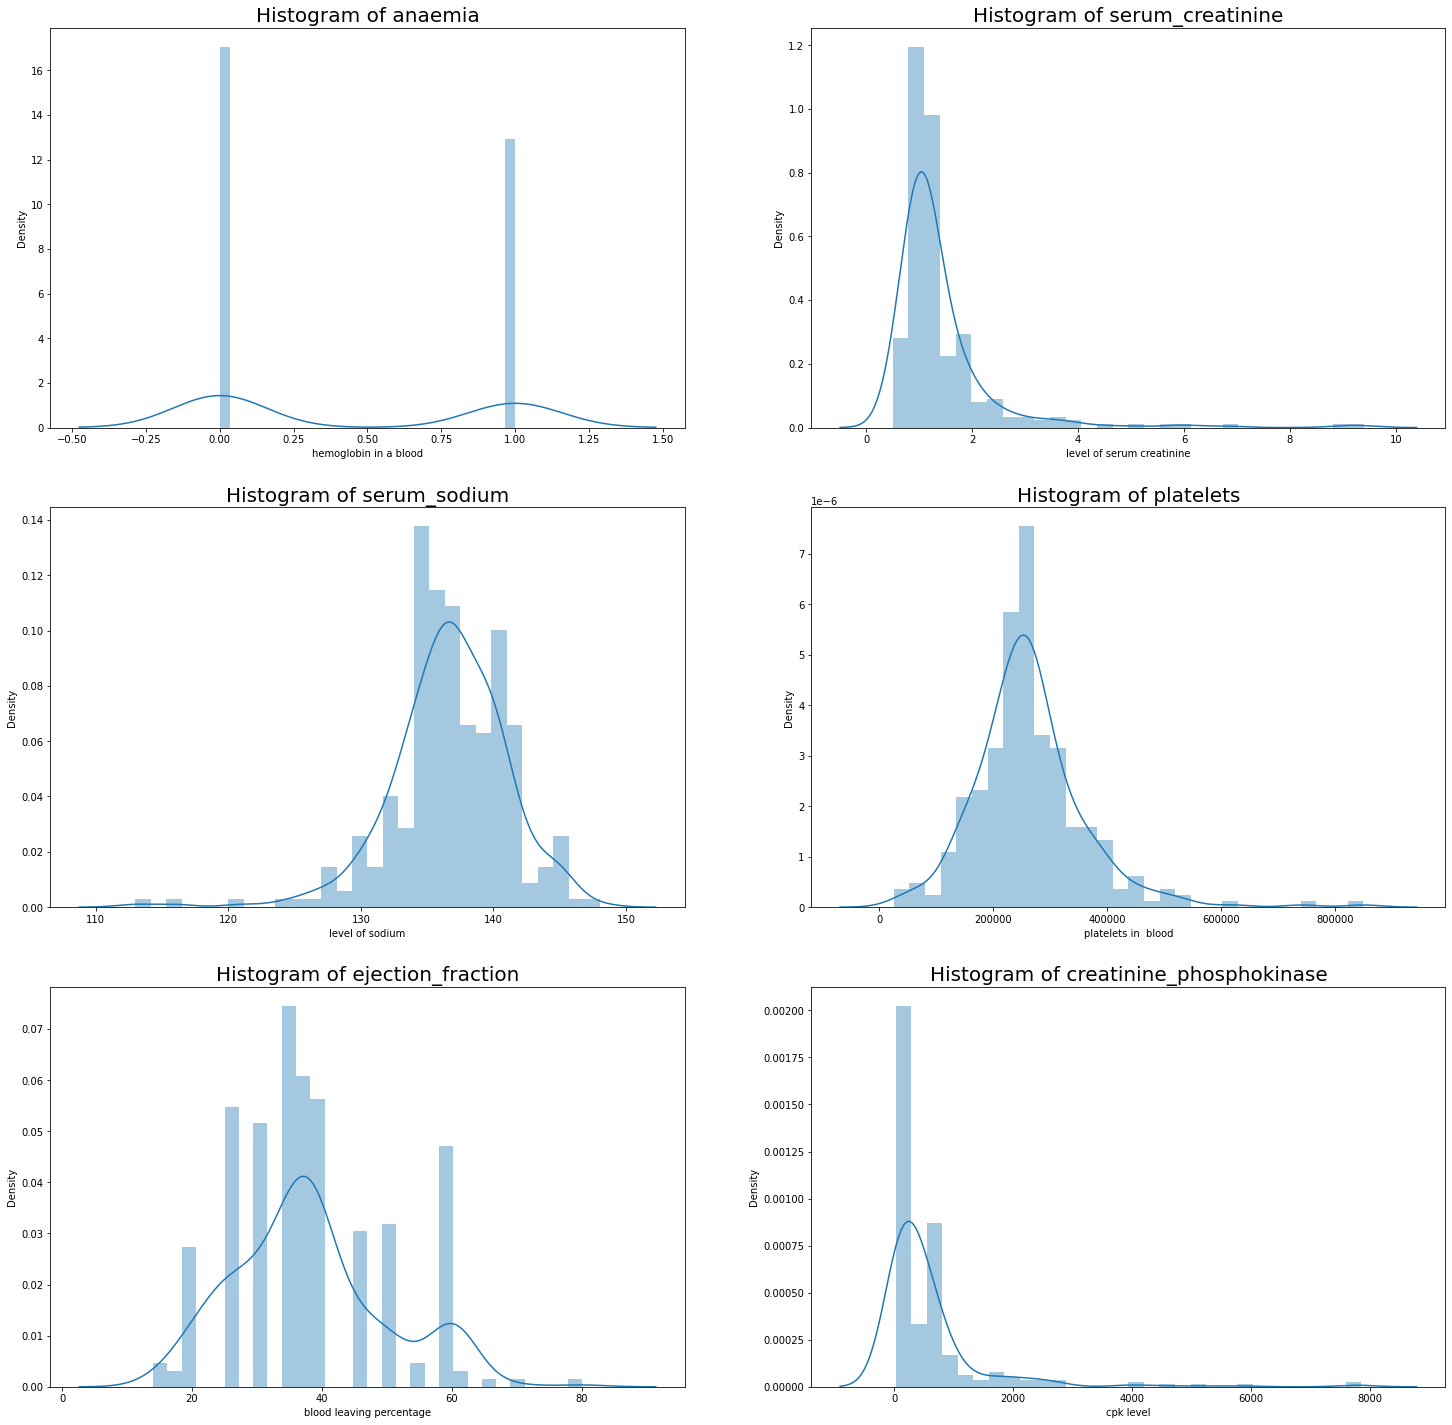

In [17]:
fig,axes=plt.subplots(3,2,figsize=(25,25))
plot_hist(df.anaemia,
         bins=30,
         title="anaemia",
         xlabels='hemoglobin in a blood',
         ax=axes[0,0])

plot_hist(df.serum_creatinine,
          bins=30,
         title="serum_creatinine",
         xlabels='level of serum creatinine',
         ax=axes[0,1])


plot_hist(df.serum_sodium,
          bins=30,
         title="serum_sodium",
         xlabels='level of sodium',
         ax=axes[1,0])



plot_hist(df.platelets,
          bins=30,
         title="platelets",
         xlabels='platelets in  blood',
         ax=axes[1,1])

plot_hist(df.ejection_fraction,
          bins=30,
         title="ejection_fraction",
         xlabels='blood leaving percentage',
         ax=axes[2,0])

plot_hist(df.creatinine_phosphokinase,
          bins=30,
         title="creatinine_phosphokinase",
         xlabels='cpk level',
         ax=axes[2,1])

plt.show()


In [18]:
fig=px.pie(df,values="smoking",names='DEATH_EVENT',color='sex')
fig.show()

In [19]:
fig=px.scatter(df,x='age',y='ejection_fraction',color='serum_sodium',size='sex',hover_data=['DEATH_EVENT'])
fig.show()

Text(0, 0.5, 'death')

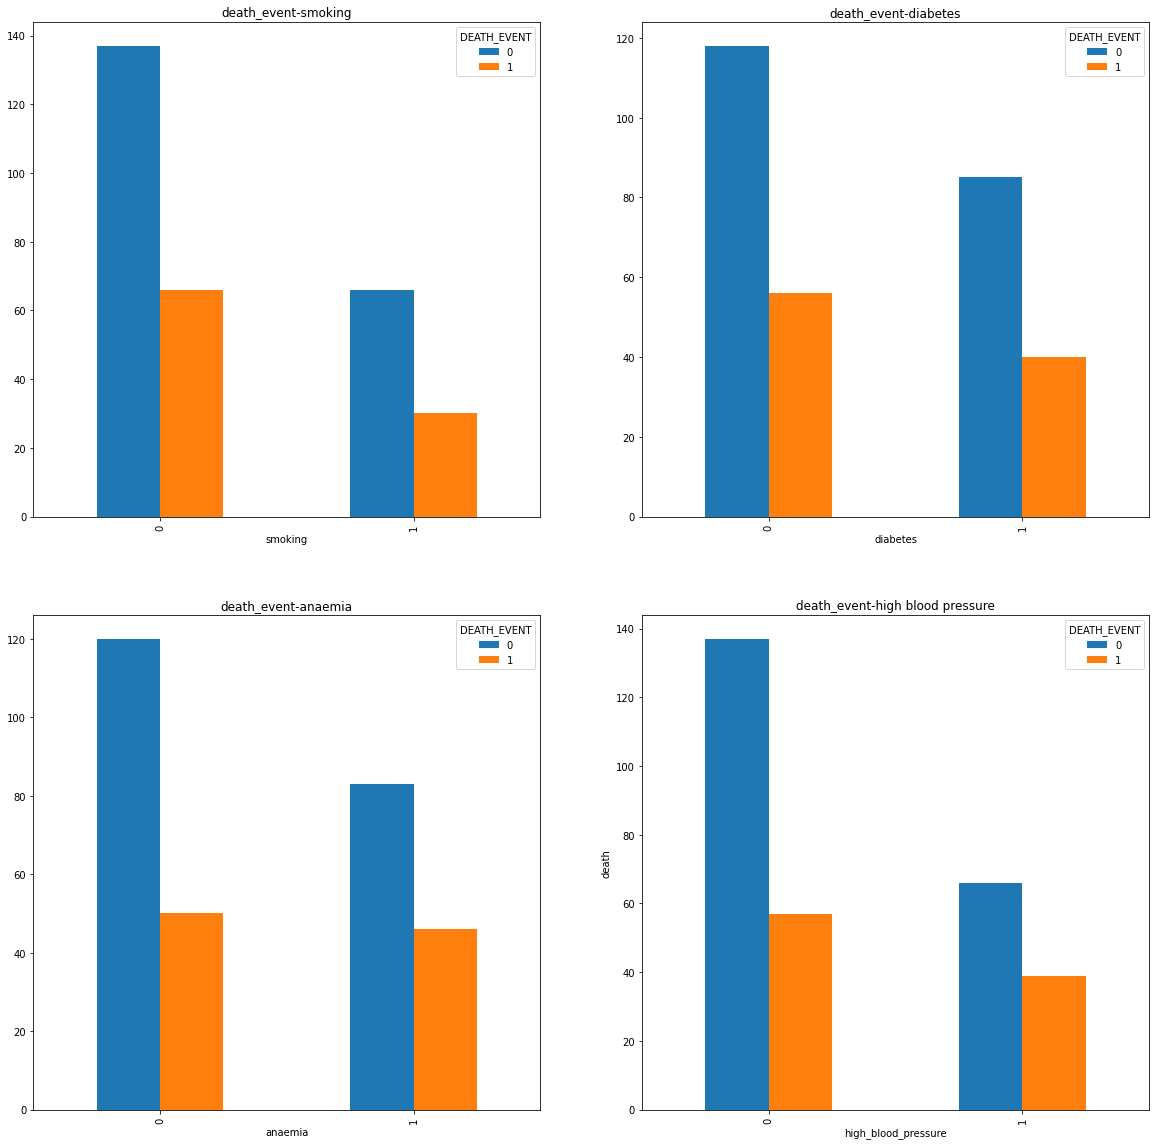

In [20]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
pd.crosstab(df.smoking,df.DEATH_EVENT).plot(kind='bar',ax=axes[0,0],title='death_event-smoking')
plt.ylabel('death')



pd.crosstab(df.diabetes,df.DEATH_EVENT).plot(kind='bar',ax=axes[0,1],title='death_event-diabetes')
plt.ylabel('death')


pd.crosstab(df.anaemia,df.DEATH_EVENT).plot(kind='bar',ax=axes[1,0],title='death_event-anaemia')
plt.ylabel('death')


pd.crosstab(df.high_blood_pressure,df.DEATH_EVENT).plot(kind='bar',ax=axes[1,1],title='death_event-high blood pressure')
plt.ylabel('death')


In [21]:
df.loc[df.DEATH_EVENT==0,'DEATH_EVENT']='Alive'
df.loc[df.DEATH_EVENT==1,'DEATH_EVENT']='Not Alive'
df.DEATH_EVENT

0      Not Alive
1      Not Alive
2      Not Alive
3      Not Alive
4      Not Alive
         ...    
294        Alive
295        Alive
296        Alive
297        Alive
298        Alive
Name: DEATH_EVENT, Length: 299, dtype: object

In [22]:
fig=px.histogram(df,x=df.age,y=df.platelets,color='sex')

fig


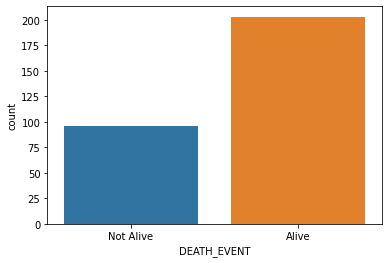

In [23]:
sns.countplot(data=df,x=df.DEATH_EVENT)

In [24]:
df.loc[df.sex==0,'sex']='women'
df.loc[df.sex==1,'sex']='men'
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,men,0,4,Not Alive
1,55.0,0,7861,0,38,0,263358.03,1.1,136,men,0,6,Not Alive
2,65.0,0,146,0,20,0,162000.00,1.3,129,men,1,7,Not Alive
3,50.0,1,111,0,20,0,210000.00,1.9,137,men,0,7,Not Alive
4,65.0,1,160,1,20,0,327000.00,2.7,116,women,0,8,Not Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,men,1,270,Alive
295,55.0,0,1820,0,38,0,270000.00,1.2,139,women,0,271,Alive
296,45.0,0,2060,1,60,0,742000.00,0.8,138,women,0,278,Alive
297,45.0,0,2413,0,38,0,140000.00,1.4,140,men,1,280,Alive


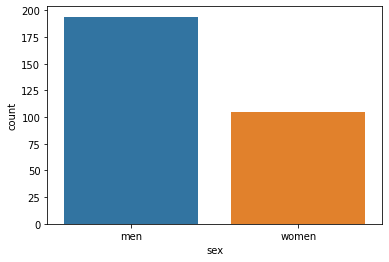

In [25]:
sns.countplot(data=df,x='sex')

In [26]:
fig=px.box(df,x=df.DEATH_EVENT,y=df.creatinine_phosphokinase,color='sex')

fig
